## Prepare Test Data

Below we test the pipeline using the newsgroup data set.

First we create a target data set by writing newsgroup data labled `comp.graphics` from the training set to one line in a jsonl file, `test/target.jsonl`.  This data set represents combining multiple employee resumes that represent ideal hires for a particular job requisite.

Next we write all categories from the newsgroup test data set line by line to a jsonl file, `test/candidate.jsonl`.  Each line in this file represents a candidate's resume for comparison with the target file.

If the pipeline works then we would expect that candidate items labeled `comp.graphics` would score higher in general than items with other labels.

---

In [1]:
## prepare the data for testing

import json
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)

target_content = ''
for i in range(len(twenty_train.data)):
    if twenty_train.target_names[twenty_train.target[i]] == 'comp.graphics':
        target_content += twenty_train.data[i]

with open('test/target.jsonl', 'w') as tfile:
    json.dump({'name':'target', 'content': target_content}, tfile)

with open('test/candidate.jsonl', 'w') as cfile:
    for i in range(len(twenty_test.data)):
        json.dump({'name': twenty_test.target_names[twenty_test.target[i]],
                   'content': twenty_test.data[i]
                  }, cfile)
        cfile.write('\n')

Next we load the jsonl files into python lists for input into the pipeline.  This process will work directly to target and candidate files created by the `pdftotext` module.

In [2]:
## read in the target and candidate jsonl files for similarity comparision
target, candidate = [], []

with open('test/target.jsonl', 'r') as f:
    for line in f:
        target.append(json.loads(line))
        
with open('test/candidate.jsonl', 'r') as f:
    for line in f:
        candidate.append(json.loads(line))

## Calculate Similarity 

Now that the data is loaded we can import and use the pipeline.

---

In [3]:
## import the similarity pipeline and perform comparison
import main
d = main.similarity(target, candidate)

## Plot Results

Above we defined `d` which is a vector of similarity scores for each document.  It is in the same order as the original candidate json list. We can use this order to combine the scores with the labels and generate plots or tables.

---

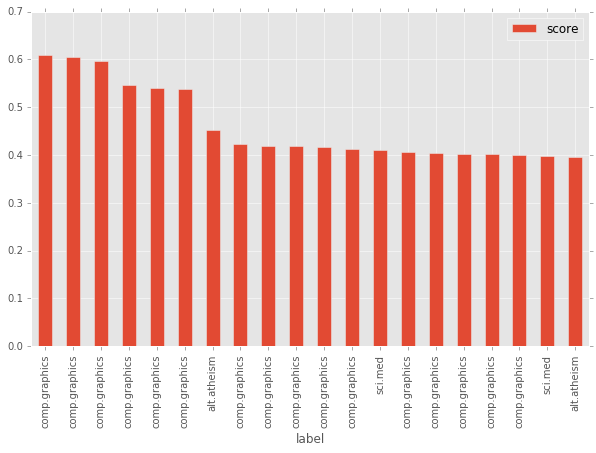

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

result = []
for i in range(len(candidate)):
    result.append((candidate[i]['name'], d[0, i]))
result = sorted(result, key=lambda x: x[1], reverse=True)

df = pd.DataFrame(result, columns=['label', 'score'])
df[:20].plot(kind='bar', x='label', y='score');

In the plot above we see that `comp.graphics` dominates the top scoring candidates for the test set.